<a href="https://colab.research.google.com/github/rukmals/Predicting_Heart_Disease/blob/main/Predicting_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [131]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Load the data

In [ ]:
# Only 14 attributes used:
# 1. #3 (age)
# 2. #4 (sex)
# 3. #9 (cp)
# 4. #10 (trestbps)
# 5. #12 (chol)
# 6. #16 (fbs)
# 7. #19 (restecg)
# 8. #32 (thalach)
# 9. #38 (exang)
# 10. #40 (oldpeak)
# 11. #41 (slope)
# 12. #44 (ca)
# 13. #51 (thal)
# 14. #58 (num) (the predicted attribute)

In [57]:
file_path = "/content/drive/MyDrive/Predicting_Heart_Disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp','trestbps', 'chol','fbs', 'restecg', 'thalach','exang', 'oldpeak','slope', 'ca','thal','label']
disease_data = pd.read_csv(file_path, delimiter=",",header=None)
disease_data.columns = column_names

## Exploring the Data

In [58]:
disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [59]:
disease_data.shape

(303, 14)

In [60]:
disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  label     303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [61]:
disease_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,label
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [62]:
disease_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
label       0
dtype: int64

In [63]:
disease_data['cp'].unique()

array([1., 4., 3., 2.])

<Axes: >

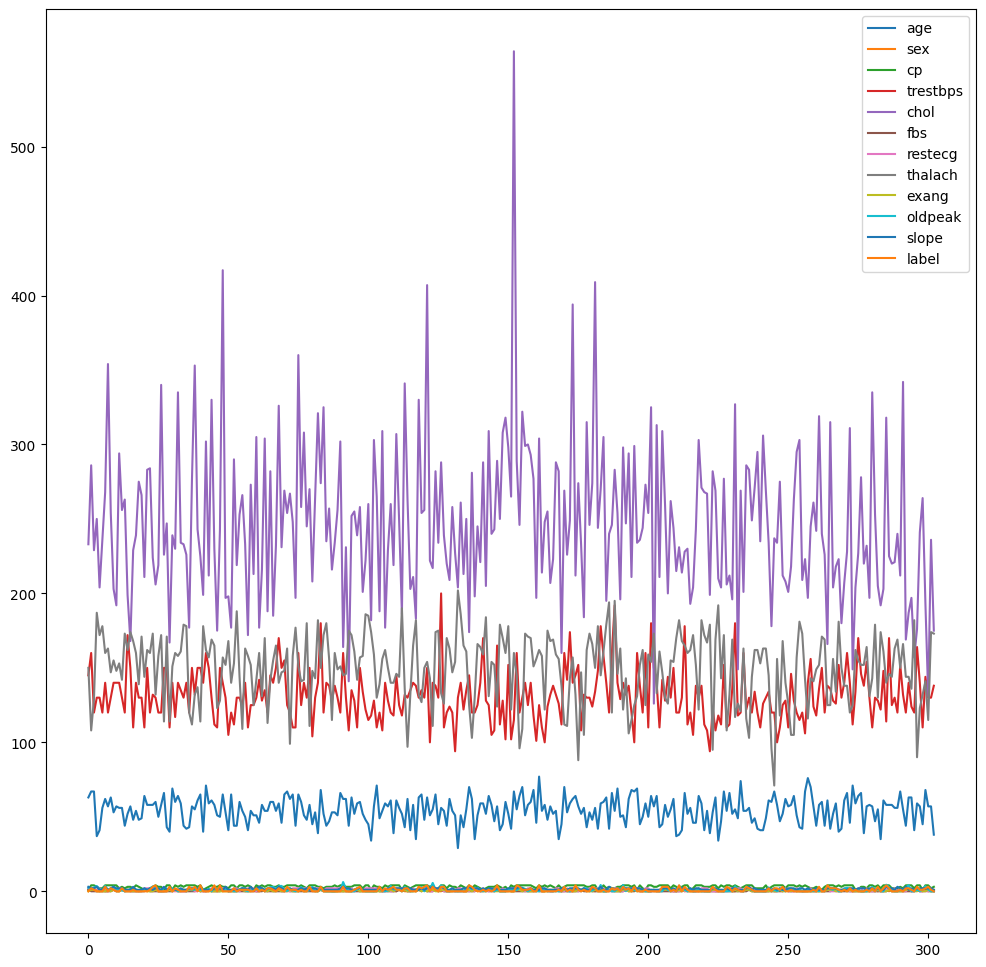

In [64]:
disease_data.plot(figsize = (12, 12 ))

<Axes: >

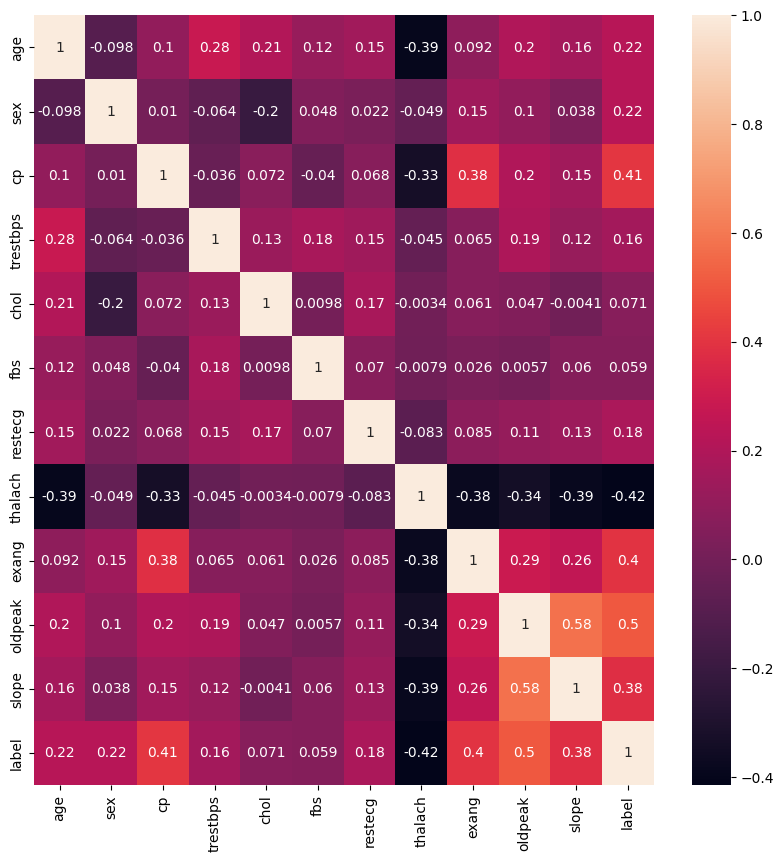

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(disease_data.corr(),annot=True)

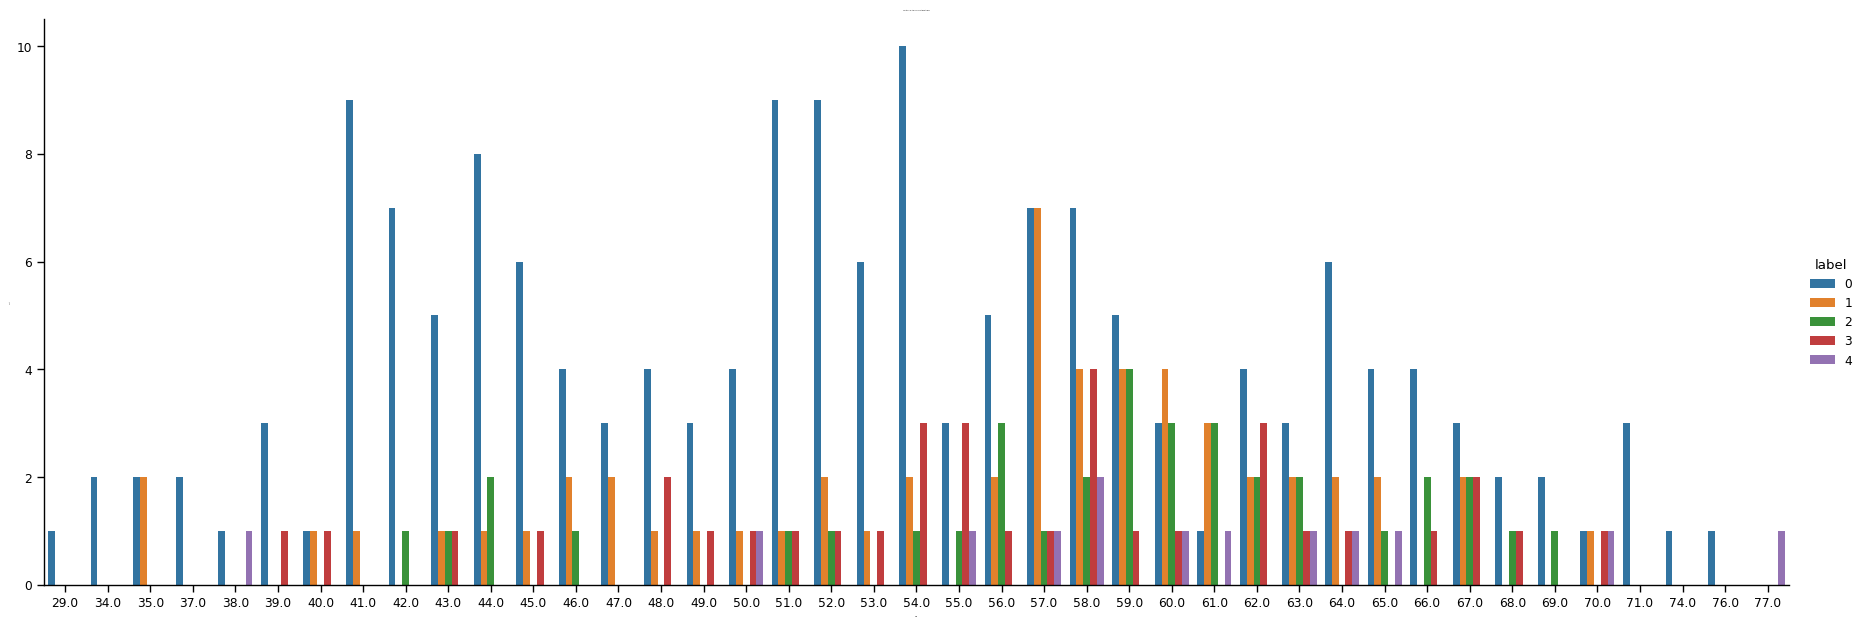

In [129]:
# distribution of target vs age 
sns.set_context("paper", font_scale = 1, rc = {"font.size": 1,"axes.titlesize": 1,"axes.labelsize": 1}) 
sns.catplot(kind = 'count', data = disease_data, x = 'age', hue = 'label', height=6, aspect=3,order = disease_data['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

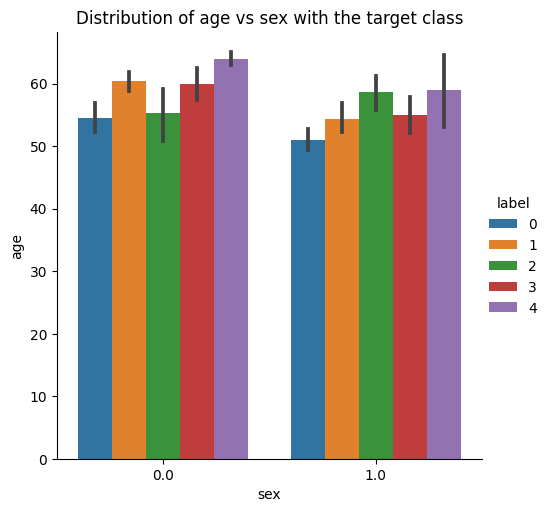

In [107]:
# barplot of age vs sex with hue = label
sns.catplot(kind = 'bar', data = disease_data, y = 'age', x = 'sex', hue = 'label')
plt.title('Distribution of age vs sex with the target class')
plt.show()

## Exploring Categorical Data

In [66]:
disease_data_categorical = disease_data.select_dtypes(include=['object'])

In [67]:
disease_data_categorical.head()

,ca,thal
0,0.0,6.0
1,3.0,3.0
2,2.0,7.0
3,0.0,3.0
4,0.0,3.0


In [68]:
disease_data_categorical.describe()

,ca,thal
count,303,303
unique,5,4
top,0.0,3.0
freq,176,166


In [69]:
disease_data_categorical['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [70]:
disease_data_categorical['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [71]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

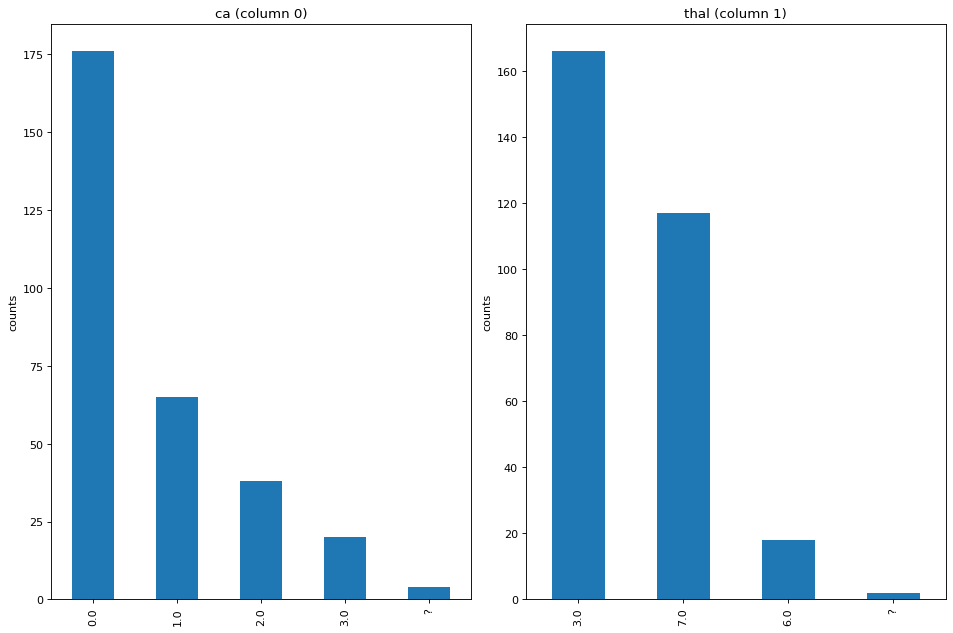

In [72]:
plotPerColumnDistribution(disease_data_categorical, 2, 2)
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

#### **Replace ? data by most frequent data**

In [73]:
disease_data.loc[disease_data['ca']=='?','ca'] = '0.0'

In [74]:
disease_data.ca.unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [75]:
disease_data.loc[disease_data['thal']=='?','thal'] = '3.0'

In [76]:
disease_data.thal.unique()

array(['6.0', '3.0', '7.0'], dtype=object)

## Analysing Target

<Axes: xlabel='label', ylabel='count'>

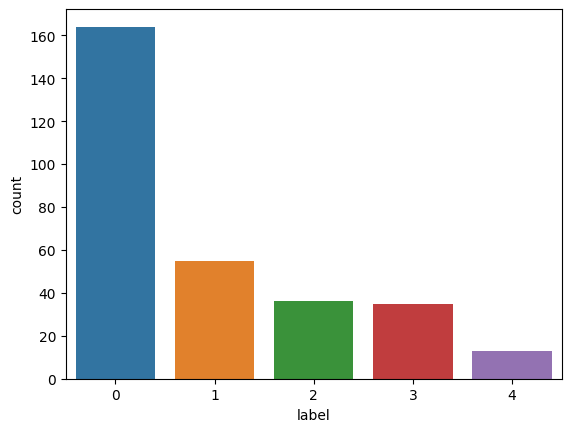

In [77]:
sns.countplot(x='label', data=disease_data)

#### **convert this problem to 0-1 classification model**

In [78]:
disease_data_copy = disease_data.copy()

In [79]:
disease_data_copy.loc[(disease_data_copy['label'] >= 1) & (disease_data_copy['label'] < 5)  , 'label'] = 1

<Axes: xlabel='label', ylabel='count'>

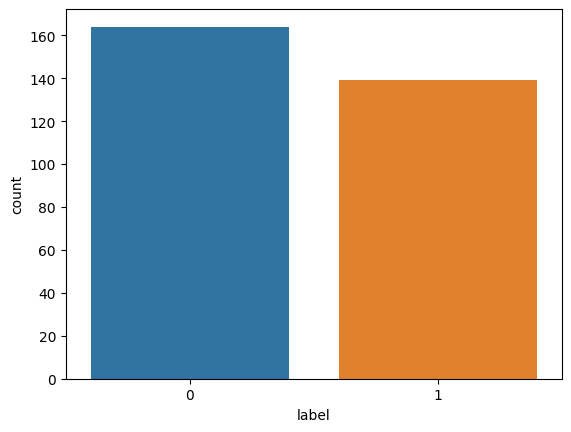

In [80]:
sns.countplot(x='label', data=disease_data_copy)

## Model Development

#### **Random Forest**

In [82]:
train_data_frame = disease_data_copy.drop(['label'],axis = 1)
labels_train = disease_data_copy.label

In [83]:
X_train, X_test, y_train, y_test = train_test_split(train_data_frame, labels_train, test_size=0.2, random_state=42)

In [132]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape

(242, 13)

In [186]:
clf_RF=RandomForestClassifier(criterion='entropy', n_estimators = 2000,min_samples_split=8,random_state=42,verbose=200)#RandomForestClassifier(n_estimators=100,max_features='auto',random_state=0, max_depth=12,min_samples_leaf=10)
clf_RF.fit(X_train_scaled,y_train)

y_pred_RF=clf_RF.predict(X_test_scaled)
y_train_pred_RF = clf_RF.predict(X_train_scaled)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 2000
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
building tree 2 of 2000
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
building tree 3 of 2000
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
building tree 4 of 2000
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
building tree 5 of 2000
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
building tree 6 of 2000
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
building tree 7 of 2000
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
building tree 8 of 2000
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
building tree 9 of 2000
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s re

In [187]:
print("train accuracy= ",metrics.accuracy_score(y_train, y_train_pred_RF))
print("test accuracy= ", metrics.accuracy_score(y_test, y_pred_RF))

train accuracy=  0.9628099173553719
test accuracy=  0.8852459016393442


In [188]:
confusion_matrix(y_pred_RF, y_test)

array([[27,  5],
       [ 2, 27]])

##### **Use Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators' : [300,500,1000],
    'min_samples_split' : [8,10,12],
    'max_features' : ['sqrt','log2'],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}

cv = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
cv.fit(X_train_scaled, y_train)

In [ ]:
cv.best_params_

#### **GradientBoostingClassifier**

In [135]:
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=14,max_features=0.5,min_samples_leaf=14,verbose=5)

GB.fit(X_train_scaled, y_train)  

      Iter       Train Loss   Remaining Time 
         1           1.3245            0.17s
         2           1.2832            0.39s
         3           1.2446            0.33s
         4           1.2051            0.28s
         5           1.1650            0.25s
         6           1.1270            0.23s
         7           1.0977            0.22s
         8           1.0660            0.21s
         9           1.0393            0.21s
        10           1.0132            0.20s
        11           0.9854            0.19s
        12           0.9585            0.19s
        13           0.9377            0.19s
        14           0.9160            0.18s
        15           0.8944            0.18s
        16           0.8755            0.18s
        17           0.8564            0.17s
        18           0.8393            0.17s
        19           0.8218            0.17s
        20           0.8077            0.16s
        21           0.7914            0.16s
        2

GradientBoostingClassifier(learning_rate=0.05, max_depth=14, max_features=0.5,
                           min_samples_leaf=14, verbose=5)

In [136]:
y_pred_GB=GB.predict(X_test_scaled)
y_train_pred_GB = GB.predict(X_train_scaled)
print("train accuracy= ",metrics.accuracy_score(y_train, y_train_pred_GB))
print("test accuracy= ", metrics.accuracy_score(y_test, y_pred_GB))

train accuracy=  0.987603305785124
test accuracy=  0.8852459016393442


In [137]:
confusion_matrix(y_pred_GB, y_test)

array([[27,  5],
       [ 2, 27]])

#### **CatBoost**

In [52]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.6 MB/s eta 0:00:00


In [54]:
from catboost import CatBoostClassifier

In [88]:
X_train_CB, X_test_CB, y_train_CB, y_test_CB = train_test_split(train_data_frame, labels_train, test_size=0.2, random_state=42)

In [89]:
X_train_CB.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,29.0,1.0,2.0,130.0,204.0,0.0,2.0,202.0,0.0,0.0,1.0,0.0,3.0
202,57.0,1.0,3.0,150.0,126.0,1.0,0.0,173.0,0.0,0.2,1.0,1.0,7.0
196,69.0,1.0,1.0,160.0,234.0,1.0,2.0,131.0,0.0,0.1,2.0,1.0,3.0
75,65.0,0.0,3.0,160.0,360.0,0.0,2.0,151.0,0.0,0.8,1.0,0.0,3.0
176,52.0,1.0,4.0,108.0,233.0,1.0,0.0,147.0,0.0,0.1,1.0,3.0,7.0


In [184]:
params= {'loss_function':'Logloss',
          'verbose': 500,
           'learning_rate':0.0008,
           'random_seed':42,
          'iterations':2000,
          'l2_leaf_reg':5,
          'depth':6
         }

model_catboost = CatBoostClassifier(**params)
model_catboost.fit(X_train_CB,y_train_CB)

0:	learn: 0.6926790	total: 1.38ms	remaining: 2.76s
500:	learn: 0.5042182	total: 783ms	remaining: 2.34s
1000:	learn: 0.4015645	total: 1.47s	remaining: 1.47s
1500:	learn: 0.3388249	total: 2.25s	remaining: 747ms
1999:	learn: 0.2958506	total: 3.28s	remaining: 0us


In [185]:
y_train_pred_CB = model_catboost.predict(X_train_CB)
y_pred_CB = model_catboost.predict(X_test_CB)
print("train accuracy= ",metrics.accuracy_score(y_train_CB, y_train_pred_CB))
print("test accuracy= ", metrics.accuracy_score(y_test_CB, y_pred_CB))

train accuracy=  0.9256198347107438
test accuracy=  0.9016393442622951


In [95]:
confusion_matrix(y_pred_CB, y_test_CB)

array([[27,  6],
       [ 2, 26]])

#### **Tensorflow RandomForest**

##### **Training a model with automated hyper-parameter tuning and automatic definition of the hyper-parameters**

In [97]:
%%capture
pip install tensorflow_decision_forests

In [98]:
import tensorflow_decision_forests as tfdf

In [96]:
# Split the dataset into a training and a testing dataset.

def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(disease_data_copy)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

205 examples in training, 98 examples for testing.


In [99]:
label = "label"
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

In [100]:
# Create a Random Search tuner with 50 trials and automatic hp configuration.
tuner_2 = tfdf.tuner.RandomSearch(num_trials=50, use_predefined_hps=True)

# Define and train the model.
model_2 = tfdf.keras.RandomForestModel(tuner=tuner_2)
model_2.fit(train_ds, verbose=2)

Use /tmp/tmpluj8tbkw as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'age': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'sex': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'cp': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'trestbps': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'chol': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'fbs': <tf.Tensor 'data_5:0' shape=(None,) dtype=float64>, 'restecg': <tf.Tensor 'data_6:0' shape=(None,) dtype=float64>, 'thalach': <tf.Tensor 'data_7:0' shape=(None,) dtype=float64>, 'exang': <tf.Tensor 'data_8:0' shape=(None,) dtype=float64>, 'oldpeak': <tf.Tensor 'data_9:0' shape=(None,) dtype=float64>, 'slope': <tf.Tensor 'data_10:0' shape=(None,) dtype=float64>, 'ca': <tf.Tensor 'data_11:0' shape=(None,) dtype=string>, 'thal': <tf.Tensor 'data_12:0' shape=(None,) dtype=string>}
Label: Tensor("data_13:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features

[INFO 23-05-02 16:35:46.7295 UTC kernel.cc:773] Start Yggdrasil model training
[INFO 23-05-02 16:35:46.7295 UTC kernel.cc:774] Collect training examples
[INFO 23-05-02 16:35:46.7295 UTC kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-05-02 16:35:46.7303 UTC kernel.cc:393] Number of batches: 1
[INFO 23-05-02 16:35:46.7303 UTC kernel.cc:394] Number of examples: 205
[INFO 23-05-02 16:35:46.7305 UTC kernel.cc:794] Training dataset:
Number of records: 205
Number of columns: 14

Number of columns by type:
	NUMERICAL: 11 (78.5714%)
	CATEGORICAL: 3 (21.4286%)

Columns:

NUMERICAL: 11 (78.5714%)
	1: "age" NUMERICAL mean:54.9024 min:29 max:76 sd:9.02086


Model trained in 0:01:52.165110
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [101]:
model_2.compile(["accuracy"])
tuned_test_accuracy = model_2.evaluate(test_ds, return_dict=True, verbose=0)["accuracy"]
print(f"Test accuracy with the TF-DF hyper-parameter tuner: {tuned_test_accuracy:.4f}")

Test accuracy with the TF-DF hyper-parameter tuner: 0.8571


In [102]:
# Display the tuning logs.
tuning_logs_2 = model_2.make_inspector().tuning_logs()
tuning_logs_2.head()

,score,evaluation_time,best,split_axis,sparse_oblique_projection_density_factor,sparse_oblique_normalization,sparse_oblique_weights,categorical_algorithm,winner_take_all,max_depth,min_examples
0,0.775610,2.298287,False,SPARSE_OBLIQUE,5.0,MIN_MAX,BINARY,CART,true,12,40
1,0.790244,5.344875,False,SPARSE_OBLIQUE,5.0,MIN_MAX,CONTINUOUS,CART,true,16,1
2,0.790244,6.608507,False,SPARSE_OBLIQUE,4.0,MIN_MAX,CONTINUOUS,RANDOM,true,16,10
3,0.800000,10.370884,False,SPARSE_OBLIQUE,1.0,MIN_MAX,CONTINUOUS,CART,true,20,10
4,0.775610,12.821418,False,SPARSE_OBLIQUE,4.0,STANDARD_DEVIATION,BINARY,CART,true,25,2


In [103]:
tuning_logs_2.loc[tuning_logs_2.best==True] #The single rows with best=True is the one used in the final model.

,score,evaluation_time,best,split_axis,sparse_oblique_projection_density_factor,sparse_oblique_normalization,sparse_oblique_weights,categorical_algorithm,winner_take_all,max_depth,min_examples
22,0.829268,50.094043,True,SPARSE_OBLIQUE,1.0,STANDARD_DEVIATION,BINARY,RANDOM,true,25,40


In [104]:
# Best hyper-parameters.
tuning_logs_2[tuning_logs_2.best].iloc[0]

score                                                 0.829268
evaluation_time                                      50.094043
best                                                      True
split_axis                                      SPARSE_OBLIQUE
sparse_oblique_projection_density_factor                   1.0
sparse_oblique_normalization                STANDARD_DEVIATION
sparse_oblique_weights                                  BINARY
categorical_algorithm                                   RANDOM
winner_take_all                                           true
max_depth                                                   25
min_examples                                                40
Name: 22, dtype: object

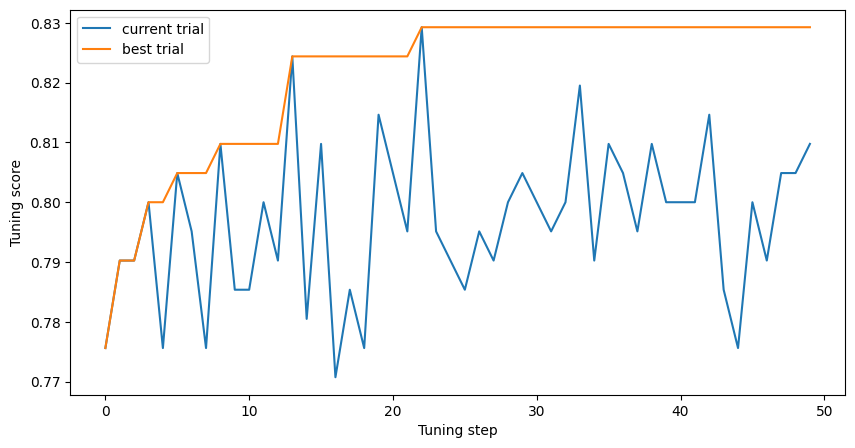

In [105]:
plt.figure(figsize=(10, 5))
plt.plot(tuning_logs_2["score"], label="current trial")
plt.plot(tuning_logs_2["score"].cummax(), label="best trial")
plt.xlabel("Tuning step")
plt.ylabel("Tuning score")
plt.legend()
plt.show()